In [11]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torchvision
%matplotlib inline
import math as math
import cv2
from numpy import meshgrid
from scipy.signal import convolve, convolve2d, correlate2d
import random

#**TASK 2 - Shapes Dataset**

In [2]:
max_area = 600
min_area = 100

In [9]:
def rotate_meshgrid(src, theta):
    oy, ox = src.shape[0]//2, src.shape[1]//2
    fill = 1
    theta = math.radians(theta)
    sh, sw = src.shape
    cx, cy = 0, 0
    while (cx > 45 or cx < 0) and (cy > 45 or cy < 0):
      cx, cy = rotate_coords([0, sw, sw, 0], [0, 0, sh, sh], theta, ox, oy)

    dw, dh = sw, sh

    dx, dy = np.meshgrid(np.arange(dw), np.arange(dh)) 
    sx, sy = rotate_coords(dx, dy, -theta, ox, oy)
    # while (cx > 45 or cx < 0) and (cy > 45 or cy < 0):
    #   sx, sy = rotate_coords(dx, dy, -theta, ox, oy)
    sx, sy = sx.round().astype(int), sy.round().astype(int)

    mask = (0 <= sx) & (sx < sw) & (0 <= sy) & (sy < sh)
    res = np.zeros_like(src)
    res[dy[mask], dx[mask]] = src[sy[mask], sx[mask]]

    res[dy[~mask], dx[~mask]] = fill

    return res

In [4]:
def random_color():
  r, g, b = list(np.random.choice(range(256), size=3))
  r = int(r)
  g = int(g)
  b = int(b)
  color = (r, g, b)
  return color

In [5]:
def draw_rec():
  w, h = 50, 50
  image = np.zeros((w, h, 3), dtype=np.uint8) * 255

  color = random_color()
  area = 0
  while area < min_area or area > max_area:
    x_start = np.random.randint(49)
    y_start = np.random.randint(49)
    x_end = np.random.randint(49)
    y_end = np.random.randint(49)

    hight = y_start - y_end
    width = x_end - x_start
    area = hight * width


  # represents the top left corner of rectangle
  start_point = (x_start, y_start)
  # represents the bottom right corner of rectangle
  end_point = (x_end , y_end)

  rec = cv2.rectangle(image, start_point, end_point, color)
  angle = np.random.randint(270)
  rec[:,:,0] = rotate_meshgrid(rec[:,:,0], angle)
  rec[:,:,1] = rotate_meshgrid(rec[:,:,1], angle)
  rec[:,:,2] = rotate_meshgrid(rec[:,:,2], angle)
  return rec

In [6]:
def draw_circle():
  w, h = 50, 50
  image = np.zeros((w, h, 3), dtype=np.uint8) * 255
  area = 0 
  coordinate_x = 0
  coordinate_y = 0
  while (area < min_area or area > max_area) or ( r + coordinate_x > 50 or r + coordinate_y > 50) or ( coordinate_x - r < 0 or  coordinate_y - r < 0):
    r = np.random.randint(49)
    coordinate_x = np.random.randint(49)
    coordinate_y = np.random.randint(49)
    area = np.pi * r * r 

  color = random_color()
  cir = cv2.circle(image, (coordinate_x, coordinate_y), r , color)
  return cir

In [7]:
def draw_triangle():
  image = np.zeros((50, 50, 3), np.uint8) * 255
  area1 = 0
  area2 = 0
  area3 = 0
  dis1 = 1
  dis2 = 1
  dis3 = 1


  while (area1 < min_area or area1 > max_area) and (area2 < min_area or area2 > max_area) and (area3 < min_area or area3 > max_area)  :
  # the conditions
  #  (area1 < min_area or area1 > max_area) or (area2 < min_area or area2 > max_area) 
  # or (area3 < min_area or area3 > max_area) or (inequality1 < dis3) or (inequality1 < dis3) or (inequality1 < dis3) :
    x1 = np.random.randint(49)
    y1 = np.random.randint(49)
    x2 = np.random.randint(49)
    y2 =  np.random.randint(49)
    x3 = np.random.randint(49)
    y3 = np.random.randint(49)

    pt1 = (x1, y1)
    pt2 = (x2, y2)
    pt3 = (x3, y3)

    color = random_color()

    dis1 = np.sqrt(np.square(x1-x2) + np.square((y1-y2)))
    dis2 = np.sqrt(np.square(x2-x3) + np.square((y2-y3)))
    dis3 = np.sqrt(np.square(x1-x3) + np.square((y1-y3)))

    area1 = (dis1 * dis2) / 2 
    area2 = (dis1 * dis3) / 2
    area3 = (dis2 * dis3) / 2  


  triangle_cnt = np.array( [pt1, pt2, pt3])
  triangle = cv2.drawContours(image, [triangle_cnt], 0, color)

  return triangle

### Checking how it looks 

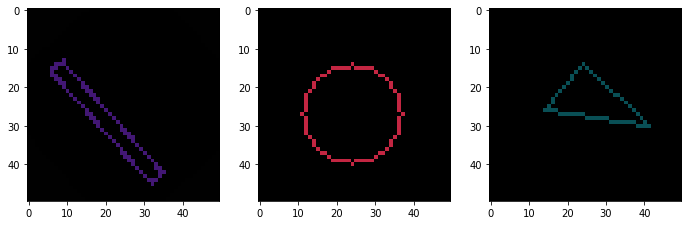

In [17]:
rec = draw_rec()
angle = np.random.randint(360)
rec = cv2.rotate(rec, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
cir = draw_circle()
tri = draw_triangle()
plt.figure(figsize=(20, 12))
images = [rec, cir, tri]
for i in range(3):
  image = images[i] 
  plt.subplot(2, 5, i+1)
  plt.imshow(image)


# Creating the Data Set 
## Also labeling the data 

In [25]:
sample_num = 300
n=0
my_data = np.zeros((50, 50, 3, sample_num * 3))
my_data = []
lables = np.zeros((sample_num*3))
for i in range(sample_num * 3):
  if i < sample_num :
    rec = draw_rec()
    lables[i] = 1
    my_data.append(rec)

  elif i >= sample_num and i <= sample_num * 2:
    cir = draw_circle()
    lables[i] = 2
    my_data.append(cir)
  elif i > sample_num * 2: 
    tri = draw_triangle()
    lables[i] = 0
    my_data.append(tri)


# Showing images without Augmentation 

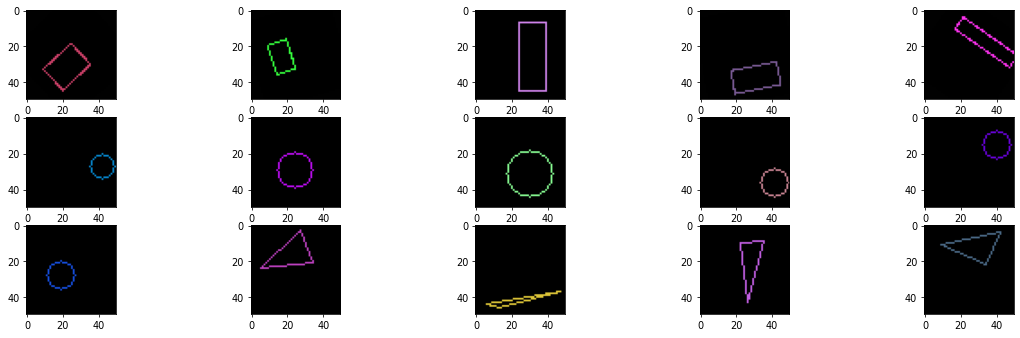

In [26]:
n = 0
plt.figure(figsize=(20, 20), dpi=70)
for i in range(3):
  digit = i*300
  for j in range(5):
    plt.subplot(10, 5, n+1)
    n +=  1
    plt.imshow(my_data[digit + j])

# Showing images with Augmentation 
### converting the images to gray scale like the augmentations from lab 3.

In [ ]:
img1 = cv2.cvtColor(my_data[90], cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(my_data[301], cv2.COLOR_BGR2GRAY)
img3 = cv2.cvtColor(my_data[699], cv2.COLOR_BGR2GRAY)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  


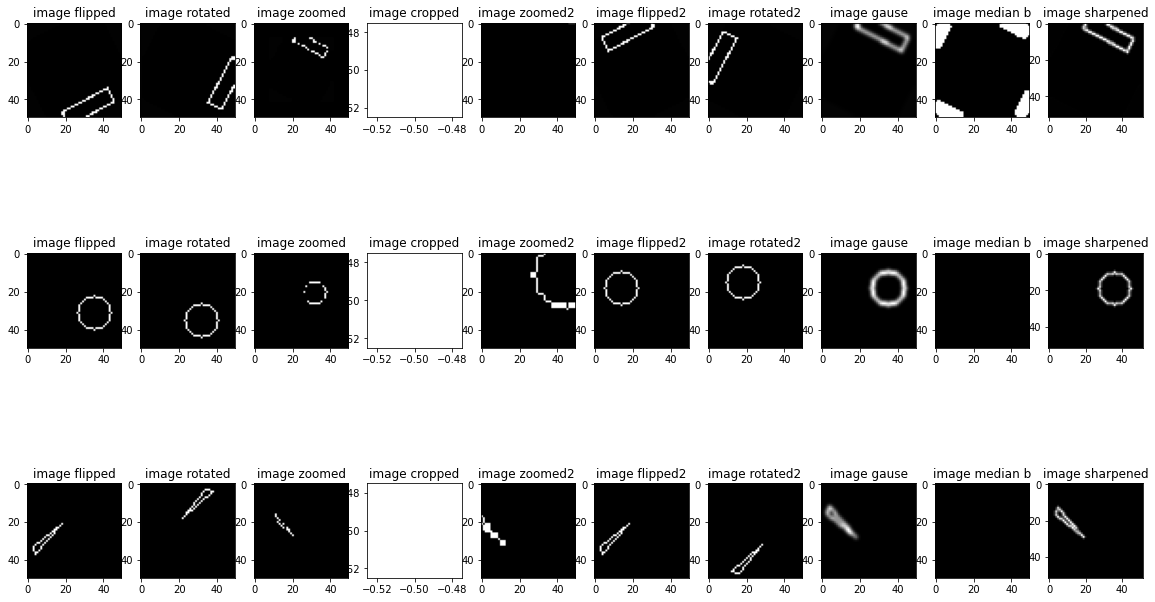

In [ ]:
plt.figure(figsize=(20, 12))
for i in range(3):
  if i == 0:
    s= augmentation(img1)
  elif i == 1:
    s= augmentation(img2)
  elif i == 2 :
    s= augmentation(img3)
  images = s.Ten_aug()
  for j in range(10):
    image , label = images[j] 
    plt.subplot(3, 10, i*10 + j+1)
    plt.title('{str}'.format(str= label))
    plt.imshow(image, 'gray')

## 90% Train images, 10% Test images

In [ ]:
class My_data():
  def __init__(self, data_set, lables):
        self.data_set = data_set
        self.lables = lables
  def load_data(self):
      x_train = []
      y_train = []
      x_test = []
      y_test = []
      size = len(self.data_set)
      percent_90 = int(size * 0.9)
      p_30 = percent_90 / 3
      p_30 = int(p_30)
      percent_10 = int(size * 10)
      p_3 = percent_10 / 3 
      for i in range(270):
        x_train.append(self.data_set[i])
        y_train.append(self.lables[i])
      for i in range(30):
        x_test.append(self.data_set[270 + i])
        y_test.append(self.lables[270 + i])
      for i in range(270):
        x_train.append(self.data_set[300 + i])
        y_train.append(self.lables[300 + i])
      for i in range(30):
        x_test.append(self.data_set[570 + i])
        y_test.append(self.lables[570+ i])
      for i in range(270):
        x_train.append(self.data_set[600 + i])
        y_train.append(self.lables[600 + i])
      for i in range(30):
        x_test.append(self.data_set[870 + i])
        y_test.append(self.lables[870 + i])

      return (x_train, y_train, x_test, y_test)




In [ ]:
data = My_data(my_data, lables)
x_train, y_train, x_test, y_test = data.load_data()

#Short summary
# SO what have i done ?
# Creating Shapes , random parameters like radius, orientation, color , random area but between 100-600.
# Splitting the data set that i created of the shapes to 90% train set and 10% train set 